# Code for loading experimental data

## Dipole field
$\mathbf{H}(\mathbf{r})=\frac{\mathbf{B}(\mathbf{r})}{\mu_0} = \frac{1}{4\pi} \left[ \frac{3\mathbf{\hat{r}}(\mathbf{m}\cdot \mathbf{\hat{r}})-\mathbf{m}}{r^3}\right]$

### z-component

$\frac{3\mathbf{r}(\mathbf{m}\cdot \mathbf{r})}{r^5}-\frac{m_z}{r^3}$, so if only z-suscept: $\frac{3r_z^2 m_z}{r^5}-\frac{m_z}{r^3}$

### y-component

$\frac{3\mathbf{r}(\mathbf{m}\cdot \mathbf{r})}{r^5}-\frac{m_y}{r^3}$, so if only z-suscept: $\frac{3r_y r_z m_z}{r^5}$



# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import transforms
from scipy import ndimage
from scipy.io import loadmat
import nibabel as nib
import pickle as pk
from scipy import interpolate

In [2]:
# set random seed for testing
np.random.seed(30)

In [3]:
# for i in range(10):
#     print(np.random.random()*1000)

In [4]:
!type python

python is /Users/alexej/anaconda3/envs/tf3/bin/python


In [5]:
!jupyter kernelspec list

Available kernels:
  covid          /Users/alexej/Library/Jupyter/kernels/covid
  mdaenv36jup    /Users/alexej/Library/Jupyter/kernels/mdaenv36jup
  tf27jup        /Users/alexej/Library/Jupyter/kernels/tf27jup
  tf3jup         /Users/alexej/Library/Jupyter/kernels/tf3jup
  twinleaf       /Users/alexej/Library/Jupyter/kernels/twinleaf
  python3        /Users/alexej/anaconda3/envs/tf3/share/jupyter/kernels/python3


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras import backend as K

In [7]:
print(tf.__version__)
print(tf.__file__)

2.0.0
/Users/alexej/anaconda3/envs/tf3/lib/python3.6/site-packages/tensorflow/__init__.py


In [6]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

SystemError: GPU device not found

# Read battery magnetometry data

In [8]:
fpath='/Users/alexej/Documents/Projects/Batteries/Budker';
local_fpath='results Jan 2019/damaged';
fname='fmap_damaged_Jan';
#fname='fmap_background_Jan';


local_fpath='results Jan 2019';
fname='fmap_3450';

#local_fpath='results May 2019/aluminumdata';
#fname='fmap_aluminum';

local_fpath='battdata-summary, new send May 2019';
# 2540: -87
# 2810: -117 
# 3000: -146
# 3100: -195
# 3340: -217
fname='fmap_2540';
fname='fmap_2810';
fname='fmap_3000';
fname='fmap_3100';
fname='fmap_3340';

In [9]:
import scipy.io as sio

In [10]:
compfname = fpath + '/' + local_fpath + '/' + fname
mat_contents = loadmat(compfname)

In [11]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri May 17 11:26:31 2019',
 '__version__': '1.0',
 '__globals__': [],
 'cscale': array([[0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
         0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
         0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
         0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
         0.037, 0.038, 0.039, 0.04 , 0.041]]),
 'rscale': array([[7.40000e-05, 1.48000e-04, 2.22000e-04, ..., 1.19954e-01,
         1.20028e-01, 1.20102e-01]]),
 'yfield': array([[  8.44128072,   8.1238133 ,   6.80989855, ...,  -4.93349688,
          -3.98436563,  -4.63475035],
        [  8.56418591,   8.26660136,   6.82150513, ...,  -4.92732979,
          -4.01846904,  -4.63737096],
        [  8.67896637,   8.34222178,   6.93101032, ...,  -4.84814807,
          -3.97239623,  -4.65554158],
        ...,
        [ -8.70246499,  -9.55873749, -10.01492062, ..., 

In [12]:
cscale=mat_contents['cscale']
rscale=mat_contents['rscale']
zfield=mat_contents['zfield']
yfield=mat_contents['yfield']

In [13]:
# downsample/resample to match nn needs (seems like easiest is to stick to powers of two)
df=10;
newcscale=np.linspace(cscale.min(),cscale.max(),32)
newrscale=np.linspace(rscale.min(),rscale.max(),64)

yqfun = interpolate.interp2d(cscale,rscale,yfield)
newy=yqfun(newcscale,newrscale)    # seems like squeeze needed to have the grid arrays as palatable 1D arrays
zqfun = interpolate.interp2d(cscale,rscale,zfield)
newz=zqfun(newcscale,newrscale)
rscale=newrscale
cscale=newcscale

In [14]:
newy=newy*1e-12;
newz=newz*1e-12;


In [14]:
print(newy.mean())
print(newz.mean())
print(np.abs(newy).mean())
print(np.abs(newz).mean())
print(np.std(newy).mean())
print(np.std(newz).mean())



-3.0470315164319605e-12
-2.1077117451907965e-11
2.6249461810770443e-11
5.849538004749767e-11
3.5699135764906516e-11
7.902435221111758e-11


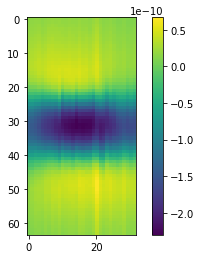

In [15]:
plt.imshow(newz)  
plt.colorbar()
plt.savefig('newz.png')

In [16]:
battery_dims=np.array([5,30,40])*1e-3;
dims=np.array([5,50,60])*1e-3;  # cell dimensions

In [17]:
if (fname=='fmap_2540'):
    idx=np.nonzero(cscale>=0.009);
    newy=newy[:,idx[1]];
    newz=newz[:,idx[1]];
    cscale=cscale[0,idx[1]];

In [18]:
### probe_dist=2.3e-2;   # 2 cm top and bottom
probe_dist=1.59e-2;   # 2 cm top and bottom


#probe_dist=1e-2;   # 2 cm top and bottom



npts=[1,16,32];

# volume element
# will this be accurate or is it minus 1?
dV=np.prod(dims/npts);   # this is volume per point in the susceptibility map, seems the correct way

# for first data
centery=0.021;
centerz=0.06;

# for second data
centery=0.015;
centerz=0.077;

# for damaged cell data
centery=0.020;
centerz=0.065;

# for new send data
centery=0.021;
centerz=0.062;

#field_dims=[dims(2)*3, dims(3)*3];
field_dims=np.array([60,80])*1e-3;


# see here: this volume probably calculated incorrectly, but it's also probably not needed
field_npts=[20,30];
dVfield=np.prod(field_dims/field_npts);    

In [19]:
# this way bottom of cell starts at x=0 (+padding), so the probe_dist is measured from the bottom of cell
srcpos=[[],[],[]]
for i in range(3):
    srcpos[i]=np.linspace(0,dims[i],npts[i]+2)
    srcpos[i]=srcpos[i][1:(npts[i]+1)]
srcpos[1]=srcpos[1]+centery-dims[1]/2
srcpos[2]=srcpos[2]+centerz-dims[2]/2

srcxv,srcyv,srczv=np.meshgrid(srcpos[0],srcpos[1],srcpos[2],indexing='ij')

src_fulllength=np.prod(npts)
src_pos_list=np.concatenate((srcxv.reshape((src_fulllength,1)),srcyv.reshape((src_fulllength,1)),srczv.reshape((src_fulllength,1))),axis=1)

In [20]:
rv, cv = np.meshgrid(rscale, cscale, indexing='ij')  # ij indexing produces same shape as newy, newz

In [21]:
# create field-pos / amp vectors
# remember that for two field components, I would have to stack them, so maybe best for now to keep them separate (position vs. field meas)
fulllength=np.prod(newy.shape)
# y, z, newy, newz

In [22]:
field_pos_list=np.concatenate((cv.reshape((fulllength,1)),rv.reshape((fulllength,1))),axis=1)
field_pos_list=np.insert(field_pos_list,0,probe_dist,axis=1)

In [23]:
# modified for multidim to include multiple field components (y-z)
# now modif for x-y-z source dims

oneD=0   # to do z-only calc in this framework

# make sure to reshape such that multiply the correct field components
# A matrix is not very sparse, so maybe faster to do in non-sparse setup
fpl=field_pos_list.shape[0]
A=np.zeros((2,fpl,src_pos_list.shape[0],3),dtype=float)
for i in range(src_pos_list.shape[0]):
    posdiff=src_pos_list[i,:]-field_pos_list
    inv_r=1/np.sqrt(np.sum(posdiff**2,axis=1))
    inv_r5=inv_r**5
    inv_r3=inv_r**3
    
    for fidx in range(2):
        fidx2=fidx+1    # this is the real dim index (compatible with sidx)
                        # since I only have y and z components of the field
        
        if oneD:
            sidx=2
            A[fidx,:,i,sidx]=3*posdiff[:,fidx2]*posdiff[:,sidx]*inv_r5
            if sidx==fidx2:
                A[fidx,:,i,sidx]=A[fidx,:,i,sidx]-inv_r3
        else:
            for sidx in range(3):
                A[fidx,:,i,sidx]=3*posdiff[:,fidx2]*posdiff[:,sidx]*inv_r5
                if sidx==fidx2:
                    A[fidx,:,i,sidx]=A[fidx,:,i,sidx]-inv_r3
    
A=A.reshape((fpl*2,src_pos_list.shape[0]*3))

In [24]:
# proper units
# a little confusing, what about the fact that field is only in the plane?
#A=A*1e-7*dV/dVfield;

# if dealing with general magnetism, maybe best to not multiply by field? 
# alternatively, suscept scale could be helpful to compare to typical vales (but also easy to convert later)

#A=A*1e-7*dV;
B0=20e-6
A=A*dV*B0/4/np.pi

In [25]:
dV

2.9296875e-08

In [27]:
field_pos_list

array([[1.59000000e-02, 1.00000000e-03, 7.40000000e-05],
       [1.59000000e-02, 2.29032258e-03, 7.40000000e-05],
       [1.59000000e-02, 3.58064516e-03, 7.40000000e-05],
       ...,
       [1.59000000e-02, 3.84193548e-02, 1.20102000e-01],
       [1.59000000e-02, 3.97096774e-02, 1.20102000e-01],
       [1.59000000e-02, 4.10000000e-02, 1.20102000e-01]])

## SVD and regularized inversion

In [26]:
# manual pseudoinverse via SVD (could use for testing pinv)
# need to check that herm conjugate commands done properly
regupar=0.5e-6
[U,S,Vherm] = np.linalg.svd(A)
invStrunc=np.where(S<regupar,0.0,1/S)

V=np.conjugate(np.transpose(Vherm))
invSmtx = np.zeros((U.shape[1], Vherm.shape[0]))
for i in range(min(U.shape[1], Vherm.shape[0])):
    invSmtx[i, i] = invStrunc[i]

# some of the transposes may need to be herm transp?
Psvd=np.dot(V,np.dot(np.transpose(invSmtx),np.transpose(U)));

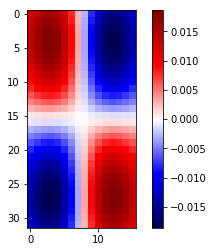

In [27]:
# examine singular values
# U and V should contain basis vectors along columns
# don't get same as before, but maybe that is correct (based on different index into singular values)

basevecimg=V[:,2].reshape((npts[0],npts[1],npts[2],3))
plt.imshow(np.transpose(np.squeeze(basevecimg[0,:,:,2])),cmap="seismic")
plt.colorbar()

In [28]:
basevecimg.shape

(1, 16, 32, 3)

In [29]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

In [30]:
def show_fields(fields):
    combined_data = np.array(fields)
    #Get the min and max of all your data
    _min, _max = np.amin(combined_data), np.amax(combined_data)

    fig = plt.figure()
    for i in range(len(fields)):
        ax = fig.add_subplot(len(fields), 1, i+1)
        #Add the vmin and vmax arguments to set the color scale
        ax.imshow(fields[i],cmap=plt.cm.YlGn, vmin = _min, vmax = _max)
        #ax.set_adjustable('box-forced')  # deprecated
        ax.set_title(str(i))
        ax.autoscale(False)

    plt.show()

In [31]:
def get_basevecimg(idx):
    basevecimg=V[:,idx].reshape((npts[0],npts[1],npts[2]))
    return np.transpose(np.squeeze(basevecimg[0,:,:]))

In [32]:
def show_V_basevec_fields(idx,dim):
    # something's not working right (not showing same plots as pedestrian approach)
    combined_data=np.empty((len(idx),npts[2],npts[1],3))   # will be transposed
    for i in idx:
        basevecimg=V[:,idx[i]].reshape((npts[0],npts[1],npts[2],3))
        combined_data[i,:,:,dim]=S[idx[i]]*np.transpose(np.squeeze(basevecimg[0,:,:,dim]))
        
    #combined_data = np.array(fields)
    #Get the min and max of all your data
    _min, _max = np.amin(combined_data[:,:,:,dim]), np.amax(combined_data[:,:,:,dim])

    # center colormap
    _max=np.amax([np.abs(_min),np.abs(_max)])
    _min=-_max
    
    fig = plt.figure(figsize=(10, 8))
    ncols=10
    nrows=np.ceil(len(idx)/ncols)
    for i in range(len(idx)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        #Add the vmin and vmax arguments to set the color scale
        #ax.imshow(np.squeeze(combined_data[i,:,:]),cmap=plt.cm.YlGn, vmin = _min, vmax = _max)
        ax.imshow(np.squeeze(combined_data[i,:,:,dim]),cmap='seismic', vmin = _min, vmax = _max)
        #ax.set_adjustable('box-forced')  # deprecated
        ax.set_title(str(idx[i]))
        ax.autoscale(False)
        ax.axis('off')

    fig.subplots_adjust(hspace=0.5, wspace=0)
    #plt.tight_layout()
    plt.show()   # is this doing anyting?
    fig.savefig('V_basevec.png')

In [33]:
def show_U_basevec_fields(idx,idx2):   # idx2 determining whether displaying y or z
    # seems working well now
    # perhaps need more systematic way of reshaping throughout (maybe always do 'F' convention?) note that the default is 'C'
    combined_data=np.empty((len(idx),newy.shape[0],newy.shape[1]))   # transposed version seems to be appropriate one, why?
    for i in idx:
        basevecimg=U[:,idx[i]].reshape((newy.shape[0]*2,newy.shape[1]))   # note: z-field underneath y-field
        # multiply by sing value for weighting (maybe sqrt more appropriate?)
        combined_data[i,:,:]=S[idx[i]]*np.squeeze(basevecimg[np.arange(newy.shape[0])+newy.shape[0]*idx2,:])
        
    #combined_data = np.array(fields)
    #Get the min and max of all your data
    _min, _max = np.amin(combined_data), np.amax(combined_data)
    
    # center colormap
    _max=np.amax([np.abs(_min),np.abs(_max)])
    _min=-_max

    fig = plt.figure(figsize=(10, 8))
    ncols=10
    nrows=np.ceil(len(idx)/ncols)
    for i in range(len(idx)):
        ax = fig.add_subplot(nrows, ncols, i+1)
        #Add the vmin and vmax arguments to set the color scale
        #ax.imshow(np.squeeze(combined_data[i,:,:]),cmap=plt.cm.YlGn, vmin = _min, vmax = _max)
        ax.imshow(np.squeeze(combined_data[i,:,:]),cmap='seismic', vmin = _min, vmax = _max)
        #ax.set_adjustable('box-forced')  # deprecated
        ax.set_title(str(idx[i]))
        ax.autoscale(False)
        ax.axis('off')

    fig.subplots_adjust(hspace=0.5, wspace=0)
    #plt.tight_layout()
    plt.show()   # is this doing anything?
    fig.savefig('U_basevec.png')   # got saved only upon second run

In [34]:
# to adjust plot size
# for one figure
fig=plt.figure(figsize=(15, 15))
# for all
plt.rcParams['figure.figsize'] = [6,4]

<Figure size 1080x1080 with 0 Axes>

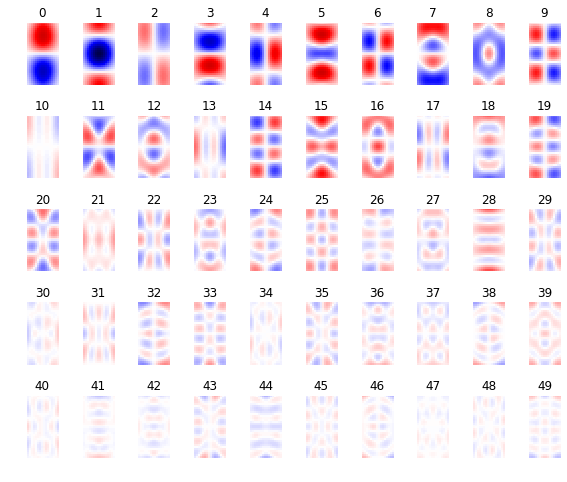

In [35]:
# principal components of suscept map
show_V_basevec_fields(range(50),2)

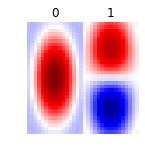

In [36]:
show_V_basevec_fields([0,1],0)

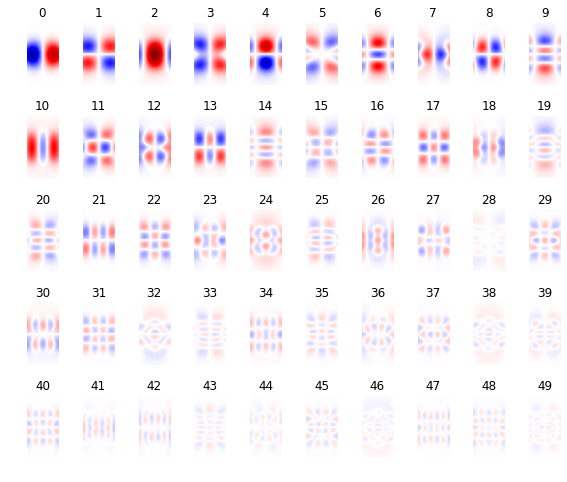

In [37]:
# principal components of y-field
show_U_basevec_fields(range(50),0)

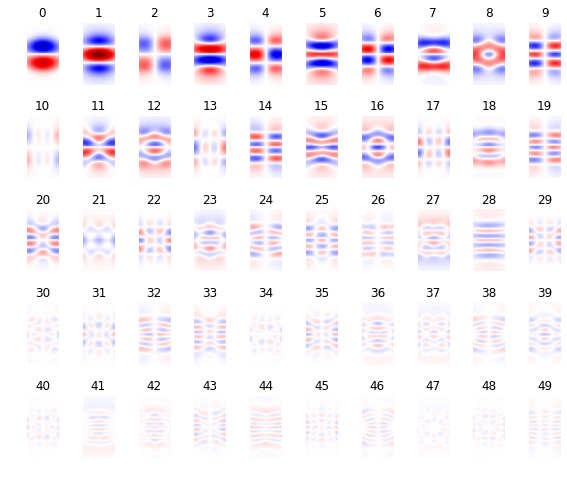

In [38]:
# principal components of z-field
show_U_basevec_fields(range(50),1)

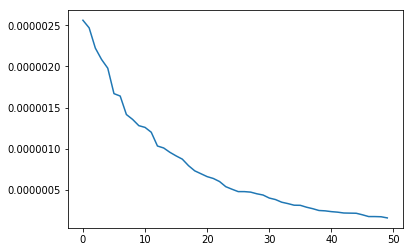

In [39]:
plt.plot(S[range(50)])

In [40]:
# here with pinv command, just need to set the rpar correctly
# why is this one much faster?
rcond=1e-1    # 1e-3 starts to significantly degrade synthetic data
P=np.linalg.pinv(A,rcond)

## Older Code for synthetic data creation

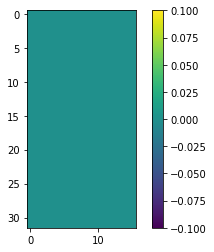

In [41]:
# here create synthetic field data
synthetic_data=0
maxlevel=200e-6
synth_suscept=np.zeros((npts[0],npts[1],npts[2],3))
if synthetic_data:
    synth_suscept[0,7,:,2]=maxlevel
    synth_suscept[0,:,10,2]=maxlevel
    synth_suscept[0,2:-2,4:-4,2]=maxlevel
    synth_suscept=synth_suscept+(np.random.random(synth_suscept.shape)-0.5)*2*0.05*maxlevel
   
plt.imshow(np.transpose(np.squeeze(synth_suscept[0,:,:,2])))
plt.colorbar()
# plot source

if synthetic_data:
    source_vec=synth_suscept.reshape((src_fulllength*3,1))
    magfield=np.dot(A,source_vec)
    yf,zf=calcfield(y_pred_ht2[0,:,:,:])
    plt.figure()
    imshow_center(zf)
else:
    magfield=np.concatenate((newy.reshape((fulllength,1)),newz.reshape((fulllength,1))),axis=0)

In [42]:
# here is the difference, src has normal ordering and exptl magfield has abnormal
# should not matter for reshaping, as long as each separate set keeps same reshaping/meshgrid procedure
synth_suscept.shape

(1, 16, 32, 3)

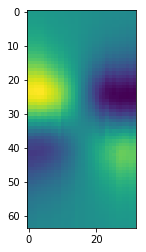

In [43]:
# redisplay magfield (for checking synth data for example, or img manipulation)
# here no transpose is needed, is this correct? for src, seems like need transpose. does it lead to any problems?
yf=magfield[0:fpl,0].reshape((newy.shape[0],newy.shape[1]))
plt.imshow(yf)

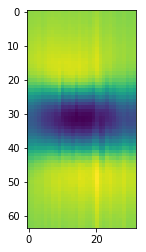

In [44]:
# redisplay magfield (for checking synth data for example, or img manipulation)
zf=magfield[fpl:2*fpl,0].reshape((newz.shape[0],newz.shape[1]))
plt.imshow(zf)

In [57]:
print(yf.mean())
print(zf.mean())
print(np.abs(yf).mean())
print(np.abs(zf).mean())
print(np.std(yf).mean())
print(np.std(zf).mean())

-3.0470315164319605e-12
-2.107711745190796e-11
2.6249461810770443e-11
5.849538004749767e-11
3.569913576490651e-11
7.902435221111758e-11


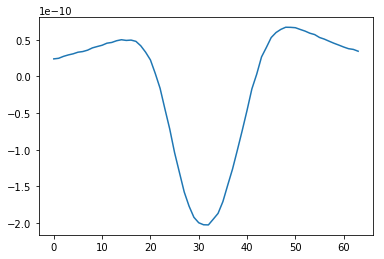

In [45]:
plt.plot(zf[:,20])

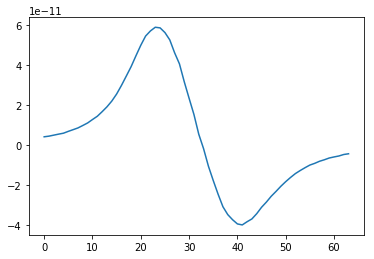

In [46]:
plt.plot(yf[:,10])

In [37]:
def multiplot(arr):
    _min, _max = np.amin(arr), np.amax(arr)

    fig = plt.figure()
    ncols=5
    nrows=np.ceil(arr.shape[2]/ncols)
    for i in range(arr.shape[2]):
        ax = fig.add_subplot(nrows, ncols, i+1)
        #Add the vmin and vmax arguments to set the color scale
        #ax.imshow(np.squeeze(combined_data[i,:,:]),cmap=plt.cm.YlGn, vmin = _min, vmax = _max)
        im=ax.imshow(np.transpose(np.squeeze(arr[:,:,i])),cmap='seismic', vmin = _min, vmax = _max)
        #ax.set_adjustable('box-forced')  # deprecated
        ax.set_title(str(i))
        ax.autoscale(False)
        ax.axis('off')

    #fig.subplots_adjust(hspace=0.5, wspace=0)
    #plt.tight_layout()
    #cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
    cb_ax=fig.add_subplot(nrows, ncols, i+2)
    cbar = fig.colorbar(im, cax=cb_ax)
    plt.show()

In [38]:
result=np.dot(P,magfield)
result=result.reshape((npts[0],npts[1],npts[2],3))
plt.imshow(np.transpose(np.squeeze(result[0,:,:,0])),cmap='seismic')
# transpose to have z point up
plt.colorbar()

NameError: name 'P' is not defined

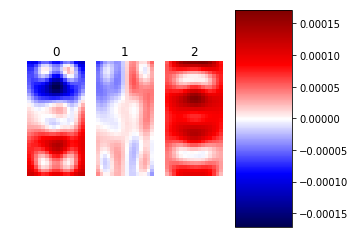

In [49]:
result=np.dot(P,magfield)
result=result.reshape((npts[0],npts[1],npts[2],3))
multiplot(np.squeeze(result[0,:,:,:]))

## Model setup

In [39]:
dropout_level=0.15

In [40]:
#adapted from https://colab.research.google.com/drive/1ltjXmi6fSAe4YBgJrmHH_wjTl9VxFRgl

def get_figure():
    """
    Returns figure and axis objects to plot on. 
    Removes top and right border and ticks, because those are ugly
    """
    fig, ax = plt.subplots(1)
    plt.tick_params(top=False, right=False, which='both') 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return fig, ax

In [41]:
def conv_block_h2(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Dropout(dropout_level)(encoder)
    encoder = layers.Activation('relu')(encoder)
    return encoder

def encoder_block_h2(input_tensor, num_filters):
    encoder = conv_block_h2(input_tensor, num_filters)
    encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)
    return encoder_pool, encoder

def decoder_block_h2(input_tensor, concat_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Dropout(dropout_level)(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    return decoder

## Training the Model

In [60]:
num_sim2=200 #can adjust, higher means slower but more accurate

In [61]:
#training_labels=np.zeros((num_sim2, npts[1], npts[2],3))
############
# for network best to create the susceptibility in the transposed version
training_labels=np.zeros((num_sim2, npts[2], npts[1],3))   
training_data=np.zeros((num_sim2, newy.shape[0], newy.shape[1],2))

In [62]:
def calcfield(suscept):
    source_vec=np.squeeze(suscept[:,:,:]).reshape((src_fulllength*3,1))
    magfield=np.dot(A,source_vec)
    fieldy = magfield[0:fpl,0].reshape((newy.shape[0],newy.shape[1]))
    fieldz = magfield[fpl:2*fpl,0].reshape((newz.shape[0],newz.shape[1]))
    return fieldy, fieldz

In [63]:
maxlevelrange=200e-6
numberpeaks=10;
idx1=range(npts[2])
idx2=range(npts[1])
midx1,midx2=np.meshgrid(idx1,idx2,indexing='ij')
for ii in range(num_sim2):
    # for now just produce z susceptibility (easier for checking result?)
    ############
    
    # here provide alternative training set  exp(-x^2/(2sigma^2))
    if True:
        for iii in range(numberpeaks):
            pos1=np.random.rand(1)*npts[2]
            pos2=np.random.rand(1)*npts[1]
            w1=np.random.rand(1)*npts[2]/5+1
            w2=np.random.rand(1)*npts[1]/5+1
            amp=np.random.rand(1)*maxlevelrange
            training_labels[ii, :, :,2]=training_labels[ii, :, :,2]+amp*np.exp(-((midx1-pos1)/w1)**2-((midx2-pos2)/w2)**2)
    else:
        # for network best to create the susceptibility in the transposed version
        #training_labels[ii, :, :,2] = maxlevelrange*np.random.rand(npts[1], npts[2])
        training_labels[ii, :, :,2] = maxlevelrange*np.random.rand(npts[2], npts[1])  # only z susceptibility for now 
        
    training_data[ii, :, :,0],training_data[ii, :, :,1] = calcfield(training_labels[ii,:,:,:])
    

In [170]:
# maxlevelrange=200e-6
# for ii in range(num_sim2):
#     # for now just produce z susceptibility (easier for checking result?)
#     ############
#     # for network best to create the susceptibility in the transposed version
#     #training_labels[ii, :, :,2] = maxlevelrange*np.random.rand(npts[1], npts[2])
#     training_labels[ii, :, :,2] = maxlevelrange*np.random.rand(npts[2], npts[1])
#     source_vec=np.squeeze(training_labels[ii,:,:,:]).reshape((src_fulllength*3,1))
#     magfield=np.dot(A,source_vec)
#     training_data[ii, :, :,0] = magfield[0:fpl,0].reshape((newy.shape[0],newy.shape[1]))
#     training_data[ii, :, :,1] = magfield[fpl:2*fpl,0].reshape((newz.shape[0],newz.shape[1]))

In [46]:
train_images_t2b=tf.constant(training_data)
train_labels_t2b=tf.constant(training_labels)
train_images_t2b.shape

TensorShape([200, 64, 32, 2])

In [47]:
train_labels_t2b.shape

TensorShape([200, 32, 16, 3])

In [48]:
def imshow_center(data):
    maxval=np.max(np.abs(data))
    plt.imshow(data, cmap="seismic",vmin=-maxval,vmax=maxval)
    plt.colorbar()

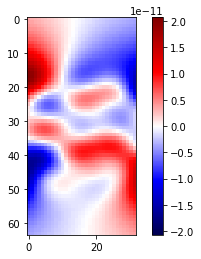

In [49]:
#plt.imshow(train_images_t2b[33,:,:,1], cmap="seismic")
#plt.colorbar()
imshow_center(train_images_t2b[33,:,:,0])
plt.savefig('training_sample.png')

ValueError: num must be 1 <= num <= 10, not 11

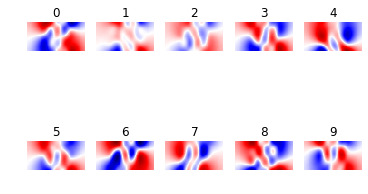

In [72]:
multiplot(np.moveaxis(np.squeeze(train_images_t2b[0:10,:,:,0]), 0, -1))

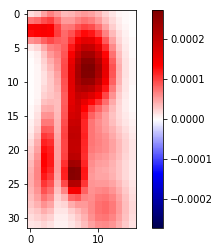

In [59]:
#plt.imshow(np.transpose(train_labels_t2b[33,:,:,2]), cmap="seismic")
#plt.colorbar()
# always need transpose for source data because of how axes are defined
#imshow_center(np.transpose(train_labels_t2b[10,:,:,2]))
imshow_center(train_labels_t2b[10,:,:,2])
plt.savefig('label_sample.png')

ValueError: num must be 1 <= num <= 10, not 11

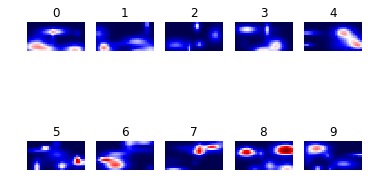

In [76]:
multiplot(np.moveaxis(np.squeeze(train_labels_t2b[0:10,:,:,2]), 0, -1))

In [64]:
def custom_loss(y_true,y_pred):
    print("y_pred shape:",y_pred[0,:,:,0].shape)
    #penalty=batt_mask128(y_pred[0,:,:,0])
    #loss=K.mean(K.square(y_pred-y_true),axis=-1)+np.sum(0*np.abs(penalty)) #can adjust the penalty weight
    loss=K.mean(K.square(y_pred-y_true),axis=None)  #+K.sum(0*K.abs(penalty)) #can adjust the penalty weight
    return loss

In [65]:
inputs_h2 = layers.Input(shape=(64,32,2))
encoder0_pool_h2, encoder0_h2 = encoder_block_h2(inputs_h2, 8)
encoder1_pool_h2, encoder1_h2 = encoder_block_h2(encoder0_pool_h2, 16)
encoder2_pool_h2, encoder2_h2 = encoder_block_h2(encoder1_pool_h2, 32)
encoder3_pool_h2, encoder3_h2 = encoder_block_h2(encoder2_pool_h2, 64)
center_h2 = conv_block_h2(encoder3_pool_h2, 128)
decoder3_h2 = decoder_block_h2(center_h2, encoder3_h2, 64)
decoder2_h2 = decoder_block_h2(decoder3_h2, encoder2_h2, 32)
decoder1_h2 = decoder_block_h2(decoder2_h2, encoder1_h2, 16)
# figure out how to downsample filter sizes, simple with conv, but do I need any activations? 
# removing one block gives output of fact 2 smaller each side
# but what happens to concatenation, probably should still use it, maybe in the filter reduction?
# actually this concatenation may not be needed
# does concatenation need the same number of filters?
# maybe could even do without concatenation?
# decoder0_h2 = decoder_block_h2(decoder1_h2, encoder0_h2, 8)
outputs_h2 = layers.Conv2D(3, (1, 1), padding="same")(decoder1_h2)   # simply set number of output channels here, seems legit

In [66]:
model_ht2b = models.Model(inputs=[inputs_h2], outputs=[outputs_h2])

adam=keras.optimizers.Adam(beta_2=0.99)

model_ht2b.compile(optimizer=adam,
             loss=custom_loss)

model_ht2b.summary()

y_pred shape: (32, 16)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 32, 2)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 32, 8)    152         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 32, 8)    32          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 64, 32, 8)    0           batch_normalization[0][0]        
_______________________________________________________________________

In [179]:
# I read that using adam with learning rate 0.001 is good
num_epochs=10 #can adjust, was 50, use 5 for testing
history_ht2b = model_ht2b.fit(train_images_t2b, train_labels_t2b,  epochs=num_epochs*1, batch_size=5, shuffle=True)

Train on 200 samples
Epoch 1/10
y_pred shape: (32, 16)
y_pred shape: (32, 16)
200/200 [==============================] - 3s 15ms/sample - loss: 0.2499
Epoch 2/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0221
Epoch 3/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0104
Epoch 4/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0064
Epoch 5/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0042
Epoch 6/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0030
Epoch 7/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0021
Epoch 8/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0015
Epoch 9/10
200/200 [==============================] - 1s 5ms/sample - loss: 0.0010
Epoch 10/10
200/200 [==============================] - 1s 5ms/sample - loss: 7.1174e-04


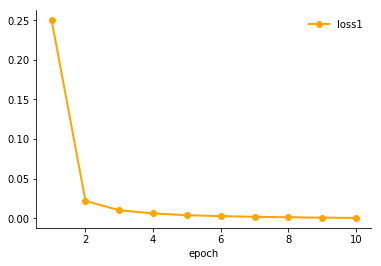

In [180]:
#adapted from https://colab.research.google.com/drive/1ltjXmi6fSAe4YBgJrmHH_wjTl9VxFRgl

loss_history_ht2b = history_ht2b.history['loss']

fig, ax = get_figure()

startpoints=0
ax.plot((np.arange(num_epochs*1)+1)[startpoints:], loss_history_ht2b[startpoints:], marker="o", linewidth=2, color="orange", label="loss1")
ax.set_xlabel('epoch')
ax.legend(frameon=False);

# ___ epochs until convergence

In [181]:
fig.savefig('history.png')

In [182]:
# # serialize model to JSON
# model_json = model_ht2b.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model_ht2b.save_weights("model.h5")
# print("Saved model to disk")

In [183]:
# save in one step
model_ht2b.save('model.h5')

In [184]:
# save history
with open('train_history.db', 'wb') as file_pi:
        pk.dump(loss_history_ht2b, file_pi)

In [185]:
#del model_ht2b
#del history_ht2b
del loss_history_ht2b

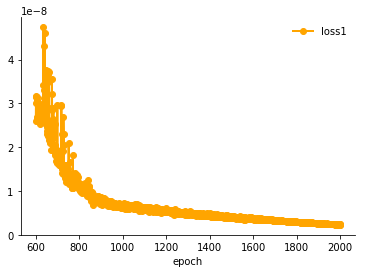

In [77]:
loss_history_ht2b = pk.load(open('results/dropout15_2000/train_history.db', "rb"))
fig, ax = get_figure()
num_epochs=len(loss_history_ht2b)
startpoints=600
ax.plot((np.arange(num_epochs*1)+1)[startpoints:], loss_history_ht2b[startpoints:], marker="o", linewidth=2, color="orange", label="loss1")
ax.set_xlabel('epoch')
ax.legend(frameon=False);

In [187]:
# # later...
 
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model_ht2b = tf.keras.models.model_from_json(loaded_model_json)
# # load weights into new model
# model_ht2b.load_weights("model.h5")
# print("Loaded model from disk")
 
    
    
# evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [68]:
# load in one step
# fixed with adding custom_loss function, in future, better to save model and weights separately?
model_ht2b=tf.keras.models.load_model('results/dropout15_2000/model.h5',custom_objects={'custom_loss': custom_loss})

y_pred shape: (32, 16)


In [ ]:
model_ht2b.compile(optimizer=adam,
             loss=custom_loss)

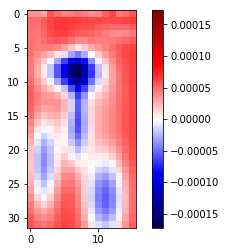

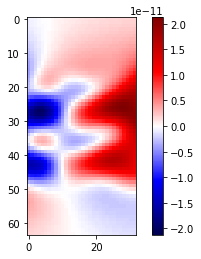

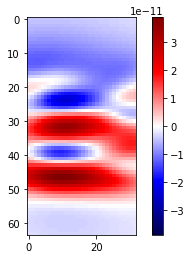

In [69]:
#Predicting the training data, adapted from https://colab.research.google.com/drive/1ltjXmi6fSAe4YBgJrmHH_wjTl9VxFRgl
# test_patch_nbr = 1
# X_test = sim_fw_full_batt_2Db[np.newaxis, test_patch_nbr,:,:, np.newaxis]
# print(X_test.shape)
# plt.imshow(X_test[0, :, :, 0], vmin=-1, vmax=1, cmap="seismic")

# print(np.max(sim_gt_full_batt_2Db[np.isfinite(sim_gt_full_batt_2Db)]))
# plt.figure()
# plt.imshow(sim_gt_full_batt_2Db[test_patch_nbr, :, :], vmin=-4, vmax=4, cmap="seismic")
# plt.colorbar()

# y_pred_ht2 = model_ht2b.predict(X_test)
# print(y_pred_ht2.shape)
# print(np.max(y_pred_ht2[np.isfinite(y_pred_ht2)]))
# plt.figure()
# plt.imshow(y_pred_ht2[0, :, :, 0], vmin=-4, vmax=4, cmap="seismic")
# plt.colorbar()

# plt.figure()
# plt.imshow(y_pred_ht2[0, :, :, 0]-sim_gt_full_batt_2Db[test_patch_nbr, :, :], vmin=-4, vmax=4, cmap="seismic")
# plt.colorbar()
test_patch_nbr = 20
susax=2
X_test = train_images_t2b[np.newaxis,test_patch_nbr,:,:,:]     # why do I need to add new axis for prediction set?
y_pred_ht2 = model_ht2b.predict(X_test)
plt.figure()
imshow_center(y_pred_ht2[0,:,:,susax]-train_labels_t2b[test_patch_nbr,:,:,susax])
yf,zf=calcfield(y_pred_ht2[0,:,:,:])
# yf and zf end up too large
plt.figure()
imshow_center(np.squeeze(X_test[0,:,:,0])-yf)
plt.figure()
imshow_center(np.squeeze(X_test[0,:,:,1])-zf)
#plt.savefig('prediction.png')